# EDA exploring for Inquiry and Prices dataset


## Import necassary libraries

In [17]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.api as sm


In [2]:
%matplotlib inline

In [3]:
#Load datasets
df_merged_IP = pd.read_csv('../data/merged_inquiries_and_prices.csv')

In [4]:
df_merged_IP.head()

,Unnamed: 0,listing_id,title_x,date,time_x,adult_count_x,children_count_x,pets_count_x,arrival_date_x,departure_date_x,inquiry_price_x,length_stay_x,min_days,date_from,date_to,filled_in_price_per_day,filled_in_price_per_week,month,price_catagory
0,0,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01 00:00:00,2021-07-22 00:07:31,6.0,2.0,0.0,2019-07-24 00:00:00,2019-07-31 00:00:00,1601.0,7,7.0,2019-06-14 00:00:00,2019-09-01 00:00:00,188.0,1316.0,2019-06,Both
1,2,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-22 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-09-27 00:00:00,2019-10-13 00:00:00,75.0,500.0,2019-09,Both
2,3,80f54c2a-c1f9-5744-a2c8-b8764c0bde87,Anfrage,2019-01-01 00:00:00,2021-07-22 00:24:34,2.0,1.0,0.0,2019-10-13 00:00:00,2019-10-20 00:00:00,0.0,7,2.0,2019-10-13 00:00:00,2019-10-28 00:00:00,75.0,500.0,2019-10,Both
3,5,202306bf-f261-5975-8356-11719a53a063,Anfrage,2019-01-01 00:00:00,2021-07-22 01:06:48,2.0,0.0,0.0,2019-04-30 00:00:00,2019-05-03 00:00:00,237.0,3,3.0,2018-09-30 00:00:00,2019-06-01 00:00:00,79.0,553.0,2018-09,Day
4,11,afcd1d75-762c-59e0-b59a-70bd6432cd8d,Anfrage,2019-01-01 00:00:00,2021-07-22 03:30:20,2.0,1.0,0.0,2019-07-06 00:00:00,2019-07-14 00:00:00,705.0,8,3.0,2019-07-06 00:00:00,2019-07-07 00:00:00,105.0,735.0,2019-07,Day


## Correcting date and time formatting.

In [5]:
df_merged_IP['date_from'] = pd.to_datetime(df_merged_IP['date_from'], errors = 'coerce')
df_merged_IP['date_to'] = pd.to_datetime(df_merged_IP['date_to'], errors = 'coerce')
df_merged_IP['date'] = pd.to_datetime(df_merged_IP['date'], errors = 'coerce')
df_merged_IP['time_x'] = pd.to_datetime(df_merged_IP['time_x'], errors = 'coerce')
df_merged_IP['arrival_date_x'] = pd.to_datetime(df_merged_IP['arrival_date_x'], errors = 'coerce')
df_merged_IP['departure_date_x'] = pd.to_datetime(df_merged_IP['departure_date_x'], errors = 'coerce')

In [6]:
# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (11, 7)

## Deleting redundant column

In [7]:
del df_merged_IP['Unnamed: 0']

## Descriptive statistics

In [8]:
df_merged_IP.describe()

,adult_count_x,children_count_x,pets_count_x,inquiry_price_x,length_stay_x,min_days,filled_in_price_per_day,filled_in_price_per_week
count,1.191363e+06,1.191363e+06,1.191363e+06,1.114013e+06,1.193366e+06,1.193276e+06,1.191664e+06,1.192185e+06
mean,2.749504e+00,3.220177e-01,1.205586e-01,6.251041e+02,6.745939e+00,3.934575e+00,8.693817e+01,5.999989e+02
std,1.130612e+00,6.633059e-01,3.256137e-01,3.745990e+02,3.117497e+00,2.218047e+00,3.531662e+01,2.440951e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,7.000000e-02
25%,2.000000e+00,0.000000e+00,0.000000e+00,3.440000e+02,4.000000e+00,2.000000e+00,6.000000e+01,4.200000e+02
50%,2.000000e+00,0.000000e+00,0.000000e+00,5.510000e+02,7.000000e+00,4.000000e+00,8.000000e+01,5.600000e+02
75%,4.000000e+00,0.000000e+00,0.000000e+00,8.300000e+02,7.000000e+00,6.000000e+00,1.050000e+02,7.350000e+02
max,6.000000e+00,2.000000e+00,1.000000e+00,1.820000e+03,1.400000e+01,2.800000e+01,2.200000e+02,1.540000e+03


In [ ]:
df_merged_IP.info()

## graphing interactions

[Text(0.5, 0, 'adult_count_x'),
 Text(1.5, 0, 'children_count_x'),
 Text(2.5, 0, 'pets_count_x'),
 Text(3.5, 0, 'inquiry_price_x'),
 Text(4.5, 0, 'length_stay_x'),
 Text(5.5, 0, 'min_days'),
 Text(6.5, 0, 'filled_in_price_per_day'),
 Text(7.5, 0, 'filled_in_price_per_week')]

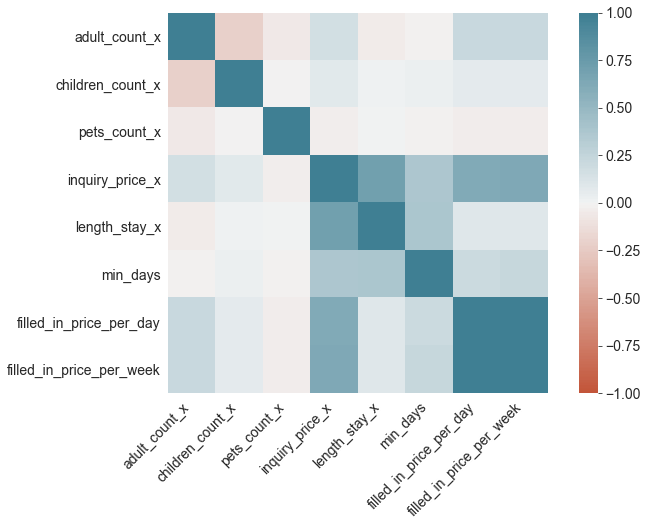

In [23]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_merged_IP.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [24]:
df_merged_IP.corr()

,adult_count_x,children_count_x,pets_count_x,inquiry_price_x,length_stay_x,min_days,filled_in_price_per_day,filled_in_price_per_week
adult_count_x,1.000000,-0.212987,-0.048513,0.169666,-0.045991,-0.020226,0.223000,0.223371
children_count_x,-0.212987,1.000000,-0.002462,0.078235,0.015028,0.025834,0.067409,0.069410
pets_count_x,-0.048513,-0.002462,1.000000,-0.027779,0.003618,-0.019726,-0.035275,-0.037509
inquiry_price_x,0.169666,0.078235,-0.027779,1.000000,0.717111,0.372911,0.616158,0.626870
length_stay_x,-0.045991,0.015028,0.003618,0.717111,1.000000,0.376196,0.094528,0.101270
min_days,-0.020226,0.025834,-0.019726,0.372911,0.376196,1.000000,0.207663,0.226638
filled_in_price_per_day,0.223000,0.067409,-0.035275,0.616158,0.094528,0.207663,1.000000,0.987144
filled_in_price_per_week,0.223371,0.069410,-0.037509,0.626870,0.101270,0.226638,0.987144,1.000000


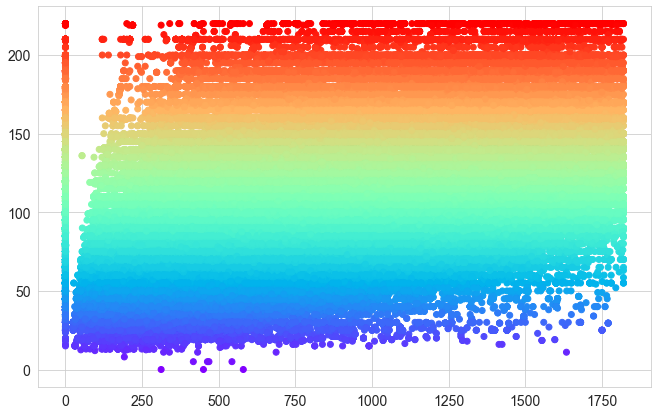

In [25]:
plt.scatter(df_merged_IP['inquiry_price_x'], df_merged_IP['filled_in_price_per_day'], c=df_merged_IP['filled_in_price_per_day'], cmap='rainbow');

In [26]:
df_merged_IP['price_catagory'].unique()

array(['Both', 'Day', 'Week'], dtype=object)

In [ ]:
sns.pairplot(df_merged_IP, hue="price_catagory", height=3);

## Modelling 

In [13]:
df_merged_IP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110562 entries, 0 to 1193365
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   listing_id                1110562 non-null  object        
 1   title_x                   1110562 non-null  object        
 2   date                      1110562 non-null  datetime64[ns]
 3   time_x                    1110562 non-null  datetime64[ns]
 4   adult_count_x             1110562 non-null  float64       
 5   children_count_x          1110562 non-null  float64       
 6   pets_count_x              1110562 non-null  float64       
 7   arrival_date_x            1110562 non-null  datetime64[ns]
 8   departure_date_x          1110562 non-null  datetime64[ns]
 9   inquiry_price_x           1110562 non-null  float64       
 10  length_stay_x             1110562 non-null  int64         
 11  min_days                  1110562 non-null  float6

In [10]:
df_merged_IP = df_merged_IP.dropna()

In [14]:
rs = smf.ols(formula='inquiry_price_x ~ filled_in_price_per_day + filled_in_price_per_week', data=df_merged_IP).fit().summary()


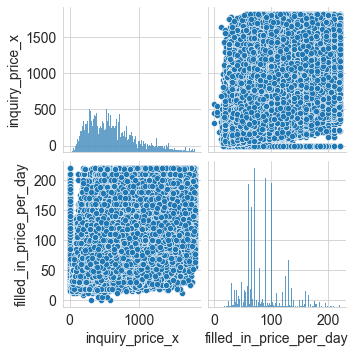

In [21]:
df_MIP = df_merged_IP[['inquiry_price_x', 'filled_in_price_per_day']]
sns.pairplot(df_MIP);

In [22]:
df_MIP = sm.add_constant(df_MIP)
y3 = df_merged_IP.filled_in_price_per_day

model3 = sm.OLS(y3, df_MIP)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     filled_in_price_per_day   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.299e+35
Date:                     Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                             11:55:44   Log-Likelihood:             3.2044e+07
No. Observations:                  1110562   AIC:                        -6.409e+07
Df Residuals:                      1110559   BIC:                        -6.409e+07
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.032e-13   1.82e-16    568.640      0.000    1.03e-13    1.04e-13
inquiry_price_x          -1.25e-16   2.29e-19   -545.335      0.000   -1.25e-16   -1.25e-16
filled_in_price_per_day     1.0000   2.49e-18   4.01e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                    98116.174   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126276.749
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       3.235   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""